# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Reading Data From the Dataset 

In [2]:
df = pd.read_csv('automobileEDA.csv')

# Viewing the first few rows from our Dataset

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Getting the information about dataset to know where is null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

# Replacing '?' , '' , ' ' with nan in each record in our Dataset

In [5]:
df.replace('?' , np.nan , inplace = True)

In [6]:
df.replace(' ' , np.nan , inplace = True)

In [7]:
df.replace('' , np.nan , inplace = True)

# Get the information again

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

# Getting all NaNs with its counts

In [9]:
missing_data = df.isnull()

In [10]:
for column in missing_data.columns.values.tolist():
#     print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    201
Name: count, dtype: int64

normalized-losses
False    201
Name: count, dtype: int64

make
False    201
Name: count, dtype: int64

aspiration
False    201
Name: count, dtype: int64

num-of-doors
False    201
Name: count, dtype: int64

body-style
False    201
Name: count, dtype: int64

drive-wheels
False    201
Name: count, dtype: int64

engine-location
False    201
Name: count, dtype: int64

wheel-base
False    201
Name: count, dtype: int64

length
False    201
Name: count, dtype: int64

width
False    201
Name: count, dtype: int64

height
False    201
Name: count, dtype: int64

curb-weight
False    201
Name: count, dtype: int64

engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
False    201
Name: count, dtype: int64

engine-size
False    201
Name: count, dtype: int64

fuel-system
False    201
Name: count, dtype: int64

bore
False    201
Name: count, dtype: int64

stroke
False    197
True       4
Name: count, dtype: int64

compression-ratio
Fals

# Drop the horsepower-binned column

In [11]:
# drop original column "horsepower-binned" from "df"
df.drop("horsepower-binned", axis = 1, inplace=True)

# Correct the Data format of 'horsepower' column

In [12]:
df['horsepower'] = df['horsepower'].astype('int64' , copy = True)

In [13]:
df['horsepower'].dtype

dtype('int64')

# Visualize the distribution of Horsepower

Text(0.5, 1.0, 'Horsepower Groups')

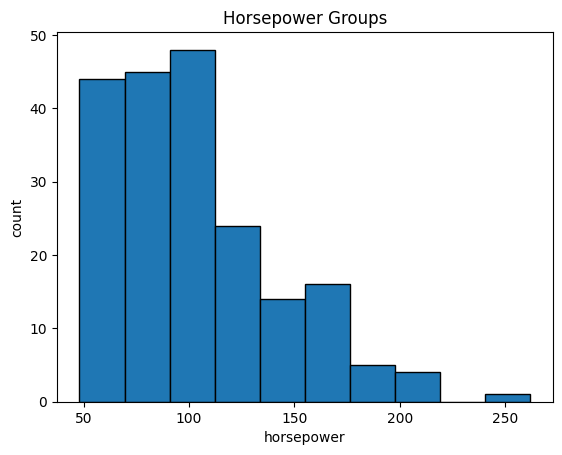

In [14]:
%matplotlib inline
plt.hist(df['horsepower'] , edgecolor = 'black')
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('Horsepower Groups')

# Get linspace of min and max of horsepower

In [15]:
bins = np.linspace(min(df['horsepower']) , max(df['horsepower']) , 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

# Identify Group Names

In [16]:
horsepower_group_names = ['Low' , 'Medium' , 'High']

# Use Pandas Cut Method to perform the binning

In [17]:
df['horsepower-binned'] = pd.cut(df['horsepower'] , bins , labels = horsepower_group_names , include_lowest = True)
df[['horsepower-binned']].head()

,horsepower-binned
0,Low
1,Low
2,Medium
3,Low
4,Low


# Get the Group counts

In [18]:
df['horsepower-binned'].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

In [19]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,horsepower-binned
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,0,1,Low
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,0,1,Low
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,0,1,Medium
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,0,1,Low
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,0,1,Low


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int64   
 2   make               201 non-null    object  
 3   aspiration         201 non-null    object  
 4   num-of-doors       201 non-null    object  
 5   body-style         201 non-null    object  
 6   drive-wheels       201 non-null    object  
 7   engine-location    201 non-null    object  
 8   wheel-base         201 non-null    float64 
 9   length             201 non-null    float64 
 10  width              201 non-null    float64 
 11  height             201 non-null    float64 
 12  curb-weight        201 non-null    int64   
 13  engine-type        201 non-null    object  
 14  num-of-cylinders   201 non-null    object  
 15  engine-size        201 non-null    int64   
 16  fuel-sys

# Replace NaN values in 'stroke' column with the mean

In [21]:
stroke_mean = df['stroke'].astype("float").mean(axis = 0)
print("Stroke mean : " , stroke_mean)

Stroke mean :  3.256903553299492


In [22]:
df['stroke'].replace(np.nan , stroke_mean , inplace = True)

# Getting the information of Dataset

In [23]:
df['stroke'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 201 entries, 0 to 200
Series name: stroke
Non-Null Count  Dtype  
--------------  -----  
201 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


# Checking the Data in Dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int64   
 2   make               201 non-null    object  
 3   aspiration         201 non-null    object  
 4   num-of-doors       201 non-null    object  
 5   body-style         201 non-null    object  
 6   drive-wheels       201 non-null    object  
 7   engine-location    201 non-null    object  
 8   wheel-base         201 non-null    float64 
 9   length             201 non-null    float64 
 10  width              201 non-null    float64 
 11  height             201 non-null    float64 
 12  curb-weight        201 non-null    int64   
 13  engine-type        201 non-null    object  
 14  num-of-cylinders   201 non-null    object  
 15  engine-size        201 non-null    int64   
 16  fuel-sys

# Saving cleaned Dataset

In [26]:
cleaned_dataset = df.to_csv('cleaned_dataset.csv')

# Get the Heatmap Correlations between all variables in our Dataset

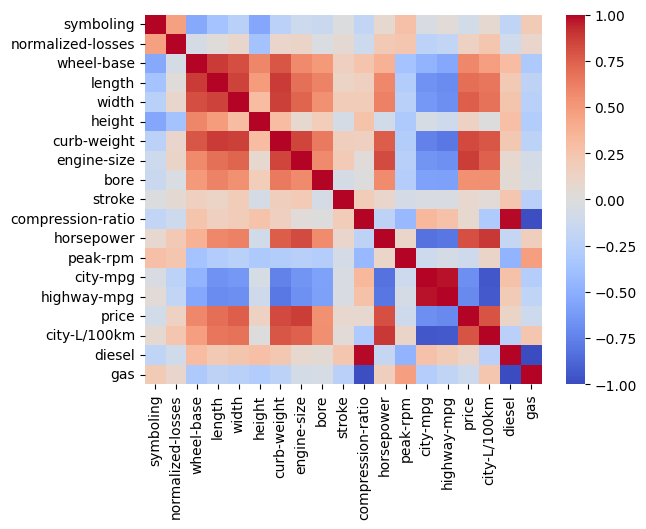

In [32]:
sns.heatmap(df.corr(numeric_only = True) , cmap='coolwarm' , annot = False)
plt.show()

# Visualize the Regression Plot of the correlation between 'highway-mpg' and 'Price'

Text(0.5, 1.0, "Regression Plot for Correlation between 'Highway-mpg' and 'Price'")

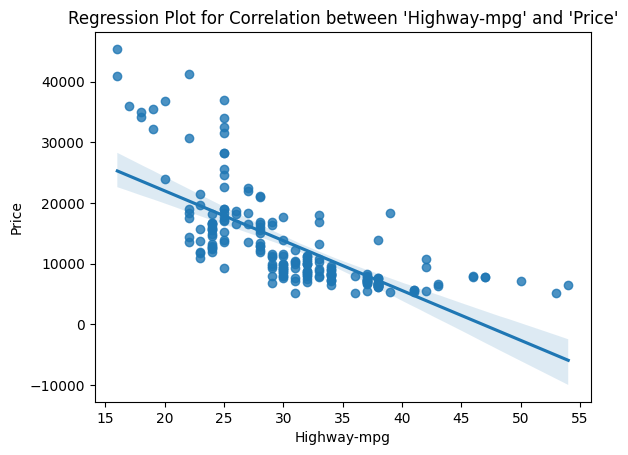

In [33]:
x = df['highway-mpg']
y = df['price']
sns.regplot(x = 'highway-mpg' , y = 'price' , data = df)
plt.xlabel("Highway-mpg")
plt.ylabel("Price")
plt.title("Regression Plot for Correlation between 'Highway-mpg' and 'Price'")

Then we see There is a negative relationship between 'highway-mpg' and 'price'

# Get the pearson Correlation between 'highway-mpg' and 'price'

In [35]:
pearson_coef_highway_mpg , p_value_highway_mpg = stats.pearsonr(df['highway-mpg'] , df['price'])

In [36]:
print("Pearson Coefficient = " ,pearson_coef_highway_mpg)
print("p-value = " , p_value_highway_mpg)

Pearson Coefficient =  -0.704692265058953
p-value =  1.7495471144475452e-31


From the result we see that : 

    1) coefficient is close to -1
    2) p-value < 0.001
    
So, the correlation between 'highway-mpg' and 'price' is "Large Negative Relationship with Strong cretainty in result"

# How could 'highway-mpg' help us predict car 'Price'?

In [39]:
lm = LinearRegression()
lm

LinearRegression()

In [40]:
X = df[['highway-mpg']]
Y = df[['price']]

# Fit the linear model using 'highway-mpg'

In [42]:
lm.fit(X , Y)

LinearRegression()

# Getting the prediction

In [43]:
Yhat = lm.predict(X)

In [44]:
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

# Getting the intercept Value

In [45]:
lm.intercept_

array([38423.30585816])

# Getting the slope Value

In [46]:
lm.coef_

array([[-821.73337832]])

# Test the Predicted price with highway : '27' Price: '13495.0'

In [63]:
predicted_price = lm.intercept_ + (lm.coef_ * 27)
predicted_price

array([[16236.50464347]])

# Getting the difference value between the predicted value and the target value

In [64]:
the_difference = predicted_price - 13495.0
the_difference

array([[2741.50464347]])

The predicted Price > The Targeted Price by 2741.51

# Testing Simple Linear model with all Car Prices of Dataset

In [54]:
lm.coef_[0][0]

-821.7333783219254

In [55]:
predicted_price = lm.intercept_ + lm.coef_[0][0] * df['highway-mpg']

In [58]:
df['predicted-price'] = predicted_price

In [61]:
df[['predicted-price']].head()

,predicted-price
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535


# Visualize the Regression Plot for Correlation between 'Predicted Price' and 'Price'

Text(0.5, 1.0, "Regression Plot for Correlation between 'Predicted Price' and 'Price'")

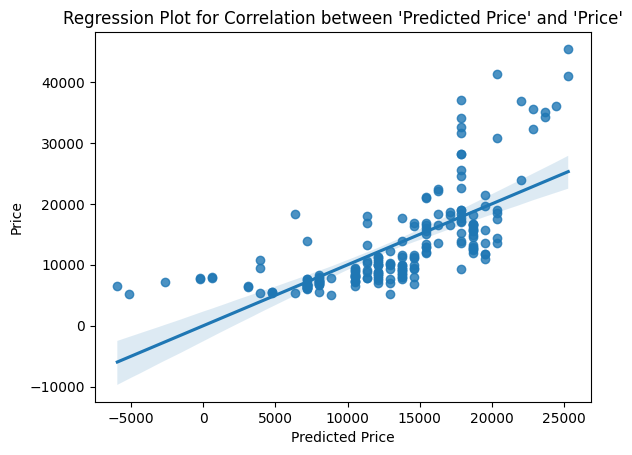

In [65]:
x = df['predicted-price']
y = df['price']
sns.regplot(x = 'predicted-price' , y = 'price' , data = df)
plt.xlabel("Predicted Price")
plt.ylabel("Price")
plt.title("Regression Plot for Correlation between 'Predicted Price' and 'Price'")

<Axes: xlabel='predicted-price', ylabel='price'>

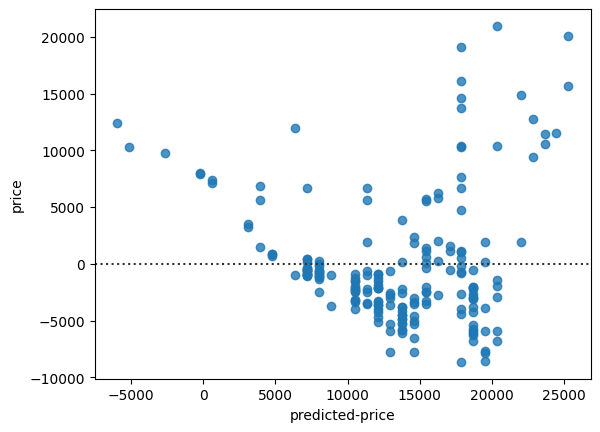

In [66]:
sns.residplot(x = df['predicted-price'] , y = df['price'])

Residuals are in a curvature form, so we need to test another independent variable

# How could 'engine-size' help us predict car 'Price'?

In [69]:
X = df[['engine-size']]
Y = df[['price']]
lm.fit(X , Y)

LinearRegression()

# Getting the prediction

In [70]:
Yhat = lm.predict(X)

In [71]:
Yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

# Getting the intercept Value

In [72]:
lm.intercept_

array([-7963.33890628])

# Getting the slope

In [73]:
lm.coef_

array([[166.86001569]])